# Regression Exercises

In this exercise, we will reproduce the regressions and graphics from the class slides and then work through a couple of examples. The purpose is to demonstrate how to estimate regressions, interpret output, and generate visualizations.

## General housekeeping items

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from statsmodels.genmod.families import Binomial
from IPython.display import display, HTML

## Correlation and regression on simulated data

Next, let’s import a set of simulated datasets containing two correlated variables `x` and `y`. Each dataset has 100 observations. The first 3 datasets illustrate a positive correlation based on the equation, `y` = `x` + `noise`, where `noise` is ‘random’ and varies across each dataset: `little_noise`, `some_noise`, and `more_noise`. The final dataset illustrates a negative correlation based on the equation `y` = 100 - `x` + `noise`. Note that each dataset is 'stacked' in this dataset and can be identified by the `label` column.

In [2]:
sim_data = pd.read_csv('sim_data.csv')

## Plot data, determine correlations, and add trendlines

Plot `y` on `x` separately for each simulated dataset (note we use `relplot` with `col` to create a faceted plot):

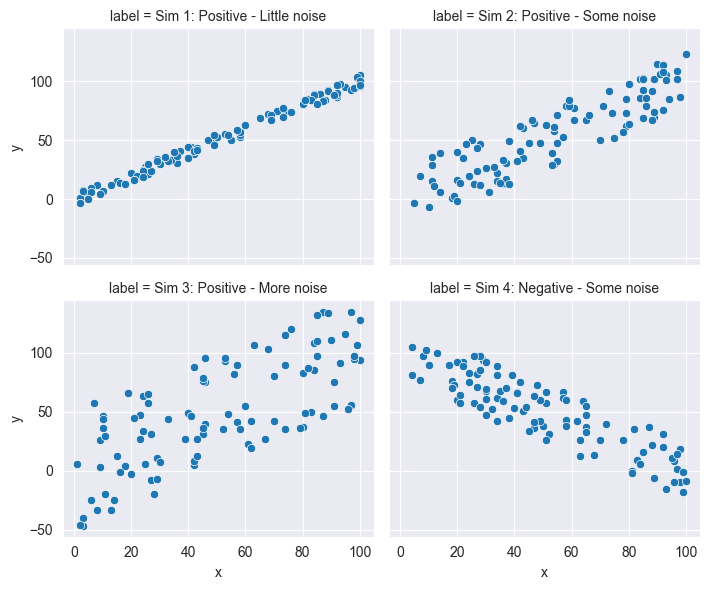

In [3]:
sns.relplot(data=sim_data,
            x="x",
            y="y",
            kind="scatter",
            col="label",
            col_wrap=2,
            height=3,
            aspect=1.2
            )

plt.show()

The first three datasets above exhibit positive correlations and the fourth dataset exhibits a negative correlation. Let's calculate correlations between `x` and `y` for the `little_noise` dataset. Note that the default correlation method in `corr()` is Pearson's r.

In [4]:
sim_data[(sim_data['label'] == 'Sim 1: Positive - Little noise')][['x', 'y']].corr()


,x,y
x,1.000000,0.994227
y,0.994227,1.000000


Alternatively, we can use `group_by` to determine the correlation for each simulated dataset.

In [5]:
sim_data.groupby('label').agg(cor=('x', lambda x: x.corr(sim_data.loc[x.index, 'y'])))

,cor
label,
Sim 1: Positive - Little noise,0.994227
Sim 2: Positive - Some noise,0.882484
Sim 3: Positive - More noise,0.733600
Sim 4: Negative - Some noise,-0.886628


## Add a trendline with regression

Using regression, we can ‘fit’ a model to our data. Below, we are going to use a regression technique called ‘ordinary least squares’ (OLS) to determine the slope and intercept (i.e., coefficients) that minimize the “sum of the squared errors.” Using `lmplot`, let’s add an OLS regression line to our plots:

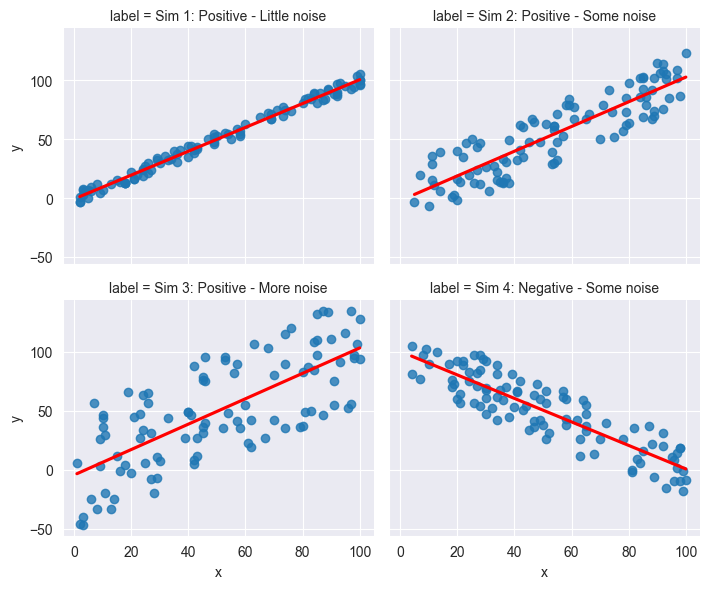

In [6]:
sns.lmplot(data=sim_data,
           x='x',
           y='y',
           ci=None,
           line_kws={'color': 'red'},
           col='label',
           col_wrap=2,
           height=3,
           aspect=1.2
           )

plt.show()

OK, now let's try this with the [diamonds](https://ggplot2.tidyverse.org/reference/diamonds.html) dataset. Reminder to import from the local pickle file if you have issues Seaborn's `load_dataset`.

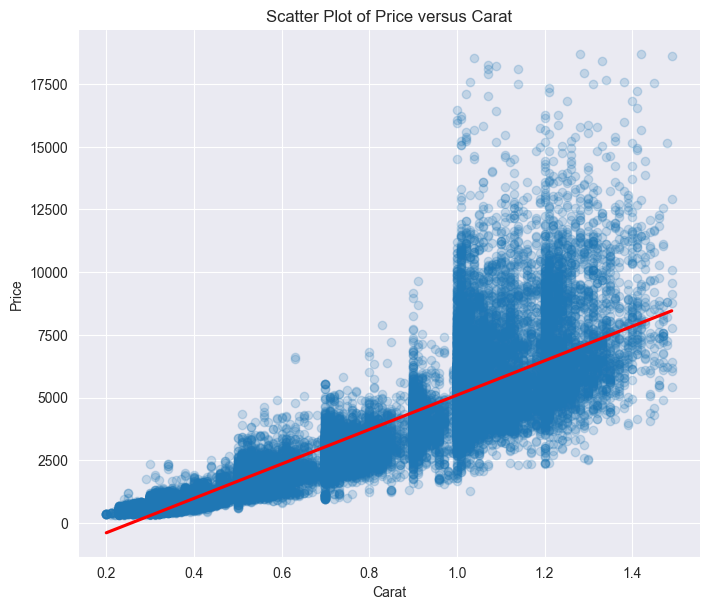

In [7]:
diamonds = sns.load_dataset('diamonds')
# diamonds = pd.read_pickle('diamonds.pkl')

diamonds_filtered = diamonds[diamonds['carat'] < 1.5]

sns.lmplot(data=diamonds_filtered,
            x='carat',
            y='price',
            ci=None,
            scatter_kws={'alpha': 0.2},
            line_kws={'color': 'red'},
            height=6,
            aspect=1.2
            )

plt.title('Scatter Plot of Price versus Carat')
plt.xlabel('Carat')
plt.ylabel('Price')

plt.show()

## Regression with the diamonds data

In Python, we can use the `statsmodels` library to perform regression analysis. The `statsmodels` library contains several useful features for estimating regressions, collecting output, and presenting results. Note above we imported `statsmodels` as `smf`. We will use the `ols()` function to perform linear regression. Below is an illustration using the [diamonds](https://ggplot2.tidyverse.org/reference/diamonds.html) dataset. Here, we are regressing price (DV) on carat weight (IV).

In [8]:
diamonds_reg_1 = smf.ols("price ~ carat", data=diamonds_filtered).fit()

print(diamonds_reg_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                 1.689e+05
Date:                Wed, 29 Oct 2025   Prob (F-statistic):               0.00
Time:                        17:03:39   Log-Likelihood:            -4.0457e+05
No. Observations:               47705   AIC:                         8.091e+05
Df Residuals:                   47703   BIC:                         8.092e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1758.2802     12.408   -141.711      0.0

Notice the simple syntax for estimating regression once the data is tidy and properly formatted! Notice that we stored the regression results in `diamonds_reg_1` which we can reference later.

We can also present these in a tabled form using `summary_col`.

In [9]:
results_table = summary_col(diamonds_reg_1,
                            stars=True,
                            info_dict={'N':lambda x: f"{int(x.nobs)}",})

print(results_table)


                   price    
----------------------------
Intercept      -1758.2802***
               (12.4075)    
carat          6858.9210*** 
               (16.6895)    
R-squared      0.7798       
R-squared Adj. 0.7798       
N              47705        
Standard errors in
parentheses.
* p<.1, ** p<.05, ***p<.01


We can also present in HTML output.

In [10]:
html_table = results_table.as_html()

display(HTML(html_table))

,price
Intercept,-1758.2802***
,(12.4075)
carat,6858.9210***
,(16.6895)
R-squared,0.7798
R-squared Adj.,0.7798
N,47705


## Regression illustration with Anscombe’s quartet

Let's import a series of datasets called Anscombe's quartet. These data are a classic example used to illustrate the importance of visualizing data before performing statistical analysis.

In [11]:
ansc_quar = sns.load_dataset('anscombe')
# ansc_quar = pd.read_pickle('anscombe.pkl')

This file is made up of 4 example datasets each identified with the `dataset` column. Let’s plot and regress:

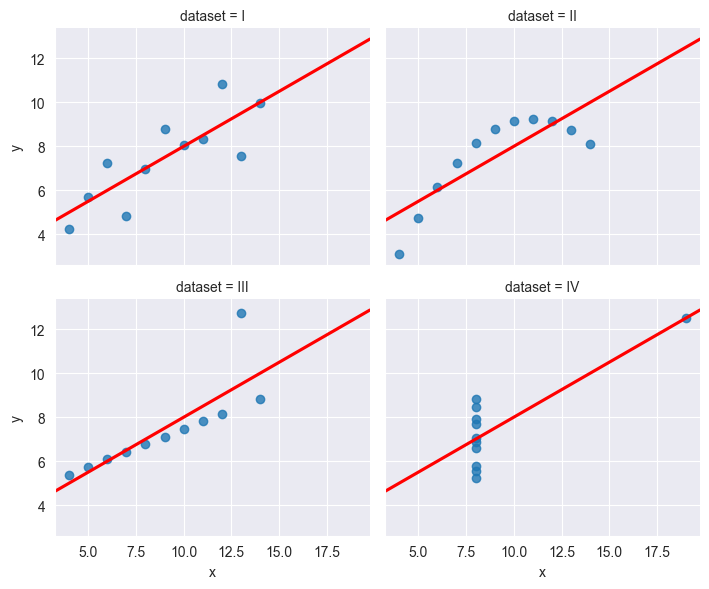

In [12]:
sns.lmplot(data=ansc_quar,
           x="x",
           y="y",
           ci=None,
           line_kws={'color': 'red'},
           truncate=False,
           col="dataset",
           col_wrap=2,
           height=3,
           aspect=1.2
           )

plt.show()

Let’s look at the regression output in table form for easy comparison. Here we will estimate a separate regression for each dataset and then aggregate the output in one table for comparison.

In [13]:
anscombes_reg_1 = smf.ols("y ~ x", data=ansc_quar[ansc_quar['dataset'] == 'I']).fit()
anscombes_reg_2 = smf.ols("y ~ x", data=ansc_quar[ansc_quar['dataset'] == 'II']).fit()
anscombes_reg_3 = smf.ols("y ~ x", data=ansc_quar[ansc_quar['dataset'] == 'III']).fit()
anscombes_reg_4 = smf.ols("y ~ x", data=ansc_quar[ansc_quar['dataset'] == 'IV']).fit()

results_table = summary_col([anscombes_reg_1, anscombes_reg_2, anscombes_reg_3, anscombes_reg_4],
                            stars=True,
                            info_dict={'N': lambda x: f"{int(x.nobs)}", })

print(results_table)


                  y I       y II     y III     y IIII 
------------------------------------------------------
Intercept      3.0001**  3.0009**  3.0025**  3.0017** 
               (1.1247)  (1.1253)  (1.1245)  (1.1239) 
x              0.5001*** 0.5000*** 0.4997*** 0.4999***
               (0.1179)  (0.1180)  (0.1179)  (0.1178) 
R-squared      0.6665    0.6662    0.6663    0.6667   
R-squared Adj. 0.6295    0.6292    0.6292    0.6297   
N              11        11        11        11       
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


## Regression with non-linear variables

Regressions are great at fitting lines to our data. While the estimates are ‘linear’ the variables need not be. That is, a regression model is flexible to non-linear transformations of variables (e.g., squared, log). In Anscombe's quarted, Dataset II follows a non linear trend between `y` and `x`. Let’s visualize a quadratic model that includes a squared term:

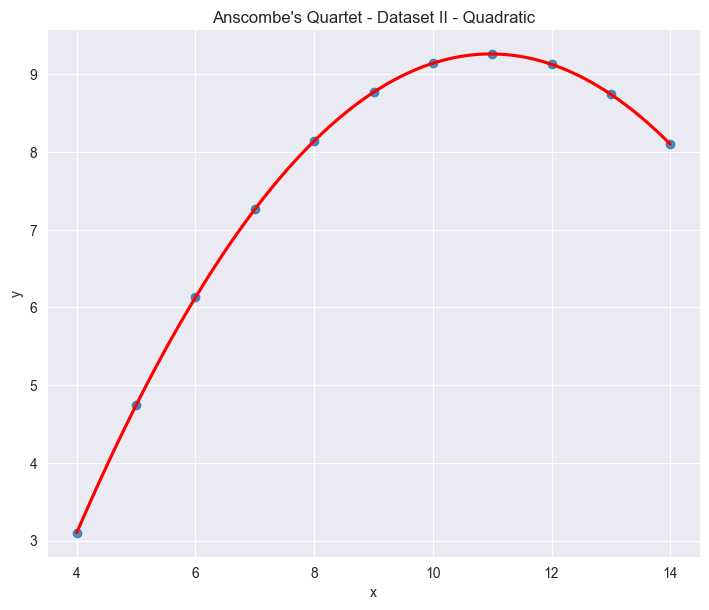

In [14]:
sns.lmplot(data=ansc_quar[ansc_quar['dataset'] == 'II'],
           x="x",
           y="y",
           order=2,
           ci=None,
           line_kws={'color': 'red'},
           height=6,
           aspect=1.2
           )

plt.title('Anscombe\'s Quartet - Dataset II - Quadratic')

plt.show()

Now let's estimate the regression using the `I(x**2)` term. Recall from [Python Basics](../02_python_basics/python_basics.ipynb) that `**` is used for exponentiation. `I()` allows us to perform a basic calculation on a variable and include it as a regressor. This is a useful technique for modeling non-linear relationships.

In [15]:
anscombes_reg_5 = smf.ols("y ~ x + I(x**2)", data=ansc_quar[ansc_quar['dataset'] == 'II']).fit()

print(anscombes_reg_5.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.378e+06
Date:                Wed, 29 Oct 2025   Prob (F-statistic):           8.64e-26
Time:                        17:03:40   Log-Likelihood:                 56.471
No. Observations:                  11   AIC:                            -106.9
Df Residuals:                       8   BIC:                            -105.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.9957      0.004  -1384.713      0.0

C:\Users\qtswanquist\DataspellProjects\ac547\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


Log transformations of variables are often useful in improving model fit and interpretability (among other benefits). Recall that the relation between price and carat in the diamonds dataset was log linear. Let’s reperform our regression above using log values for price and carat. To do so, we will calculate the log of carat and price and store in new variables.

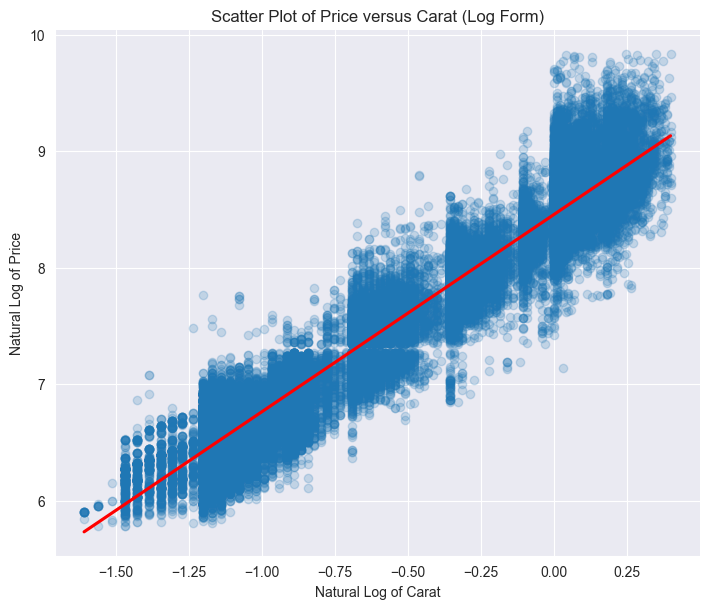

In [16]:
diamonds_filtered = diamonds_filtered.copy()
diamonds_filtered['log_carat'] = np.log(diamonds_filtered['carat'])
diamonds_filtered['log_price'] = np.log(diamonds_filtered['price'])

sns.lmplot(data=diamonds_filtered,
           x='log_carat',
           y='log_price',
           ci=None,
           scatter_kws={'alpha': 0.2},
           line_kws={'color': 'red'},
           height=6,
           aspect=1.2
           )

plt.title('Scatter Plot of Price versus Carat (Log Form)')
plt.xlabel('Natural Log of Carat')
plt.ylabel('Natural Log of Price')

plt.show()

In [17]:
diamonds_reg_2 = smf.ols("np.log(price) ~ np.log(carat)", data=diamonds_filtered).fit()

print(diamonds_reg_2.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 5.056e+05
Date:                Wed, 29 Oct 2025   Prob (F-statistic):               0.00
Time:                        17:03:40   Log-Likelihood:                -3344.5
No. Observations:               47705   AIC:                             6693.
Df Residuals:                   47703   BIC:                             6711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.4584      0.002   4933.938

## Multiple regression

Regressions can have more than one predictor or ‘x’ variable. In fact, we can expand our regression models to estimate the effects of many variables. Let's add all four "C's" to the model. Since clarity, cut, and color are categorical we will convert to numeric (multiplied by -1 so that higher values are associates with better characteristics). Using the diamonds dataset, let’s increase the number of variables in our model one step at a time:

In [18]:
diamonds_filtered = diamonds_filtered.copy()

# Create numeric versions of the categorical columns: clarity, cut, and color.
diamonds_filtered['clarity_numeric'] = pd.Categorical(diamonds_filtered['clarity']).codes * -1
diamonds_filtered['cut_numeric'] = pd.Categorical(diamonds_filtered['cut']).codes * -1
diamonds_filtered['color_numeric'] = pd.Categorical(diamonds_filtered['color']).codes * -1

diamonds_reg_short1 = smf.ols("np.log(price) ~ np.log(carat)", data=diamonds_filtered).fit()
diamonds_reg_short2 = smf.ols("np.log(price) ~ clarity_numeric", data=diamonds_filtered).fit()
diamonds_reg_short3 = smf.ols("np.log(price) ~ cut_numeric", data=diamonds_filtered).fit()
diamonds_reg_short4 = smf.ols("np.log(price) ~ color_numeric", data=diamonds_filtered).fit()
diamonds_reg_long1 = smf.ols("np.log(price) ~ np.log(carat) + clarity_numeric + cut_numeric + color_numeric", data=diamonds_filtered).fit()

results_table = summary_col([diamonds_reg_short1, diamonds_reg_short2, diamonds_reg_short3, diamonds_reg_short4, diamonds_reg_long1],
                            stars=True,
                            info_dict={'N': lambda x: f"{int(x.nobs)}", })

print(results_table)


                np.log(price) I np.log(price) II np.log(price) III np.log(price) IIII np.log(price) IIIII
---------------------------------------------------------------------------------------------------------
Intercept       8.4584***       7.2633***        7.5194***         7.5202***          9.2442***          
                (0.0017)        (0.0101)         (0.0056)          (0.0072)           (0.0025)           
np.log(carat)   1.6916***                                                             1.8860***          
                (0.0024)                                                              (0.0014)           
clarity_numeric                 -0.0824***                                            0.1214***          
                                (0.0024)                                              (0.0004)           
cut_numeric                                      -0.0566***                           0.0307***          
                                             

Note the patterns in coefficient estimates and r-squares above. Why do clarity, cut, and color have negative coeffients in columns 2-4? Why do these reverse when including all variables simultaneously in column 5?

## Multiple regression with categorical variables

Above, we treated all variables as numeric (even ordinal categorical/factor variables like clarity). Alternatively, we can also estimate the effect of each level of a categorical level separately by including an indicator variable for each level. See the example below.

In [19]:
diamonds_reg_long2 = smf.ols("np.log(price) ~ np.log(carat) + C(clarity) + C(cut) + C(color)",data=diamonds_filtered).fit()

results_table = summary_col(diamonds_reg_long2,
                            stars=True,
                            info_dict={'N': lambda x: f"{int(x.nobs)}", })

print(results_table)


                    np.log(price)
---------------------------------
Intercept           9.1431***    
                    (0.0039)     
C(clarity)[T.VVS1]  -0.0972***   
                    (0.0039)     
C(clarity)[T.VVS2]  -0.1686***   
                    (0.0037)     
C(clarity)[T.VS1]   -0.3086***   
                    (0.0036)     
C(clarity)[T.VS2]   -0.3795***   
                    (0.0035)     
C(clarity)[T.SI1]   -0.5317***   
                    (0.0035)     
C(clarity)[T.SI2]   -0.6907***   
                    (0.0037)     
C(clarity)[T.I1]    -1.0526***   
                    (0.0068)     
C(cut)[T.Premium]   -0.0169***   
                    (0.0016)     
C(cut)[T.Very Good] -0.0462***   
                    (0.0016)     
C(cut)[T.Good]      -0.0812***   
                    (0.0023)     
C(cut)[T.Fair]      -0.1560***   
                    (0.0039)     
C(color)[T.E]       -0.0572***   
                    (0.0022)     
C(color)[T.F]       -0.1001***   
             

Notice that each categorical variable is split into several 'indicator' variables representing each category. If you pay close attention, one category is excluded. This category can be thought of as the 'base' or comparison group and is relegated to the intercept. In any case, our predictive power (the r-squared) is already very high (>0.97), and this approach results in modest improvements (0.978 vs. 0.975).

## Extra practice with regression - CPUs

On the course site, you will find a dataset containing prices of CPUs. The data was collected from [PassMark](https://www.cpubenchmark.net/) in September 2022 and is included in this repo. Let’s practice regression and visualization using that dataset:

In [20]:
cpu_data = pd.read_csv('cpu_data.csv')

cpu_data.head()

,id,cpu,cpu_mark,price_usd,brand
0,1,AMD Ryzen Threadripper PRO 5995WX,97275,9018.00,AMD
1,2,AMD EPYC 7773X,90731,5500.00,AMD
2,4,AMD EPYC 7763,85944,4749.99,AMD
3,5,AMD EPYC 7713,85521,4199.99,AMD
4,7,AMD Ryzen Threadripper PRO 3995WX,83153,6888.83,AMD


Let’s plot CPU price on CPU performance with a regression line:

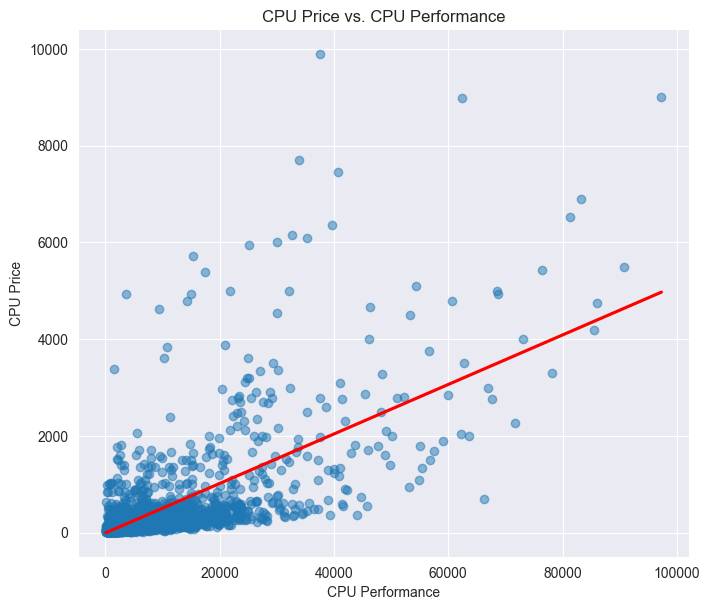

In [21]:
sns.lmplot(data=cpu_data,
           x='cpu_mark',
           y='price_usd',
           scatter_kws={'alpha': 0.5},
           line_kws={'color': 'red'},
           ci=None,
           height=6,
           aspect=1.2
           )

plt.title("CPU Price vs. CPU Performance")
plt.xlabel("CPU Performance")
plt.ylabel("CPU Price")

plt.show()

Note that the relationship is non-linear (a lot like the diamonds data above). Let’s try logging both variables to see if that improves linearity:

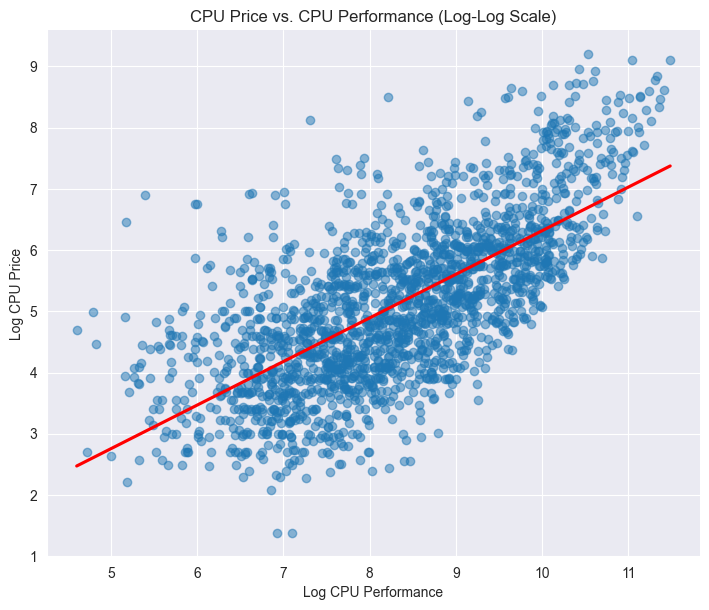

In [22]:
cpu_data['log_price'] = np.log(cpu_data['price_usd'])
cpu_data['log_performance'] = np.log(cpu_data['cpu_mark'])

sns.lmplot(data=cpu_data,
           x='log_performance',
           y='log_price',
           ci=None,
           scatter_kws={'alpha': 0.5},
           line_kws={'color': 'red'},
           height=6,
           aspect=1.2
           )

plt.title("CPU Price vs. CPU Performance (Log-Log Scale)")
plt.xlabel("Log CPU Performance")
plt.ylabel("Log CPU Price")

plt.show()

That's better! Next, assign color to brand:

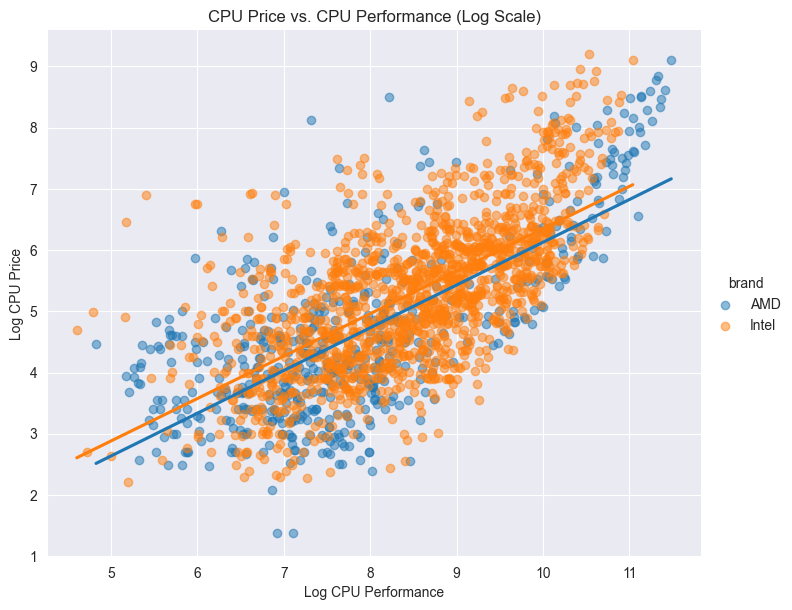

In [23]:
cpu_data['log_price'] = np.log(cpu_data['price_usd'])
cpu_data['log_performance'] = np.log(cpu_data['cpu_mark'])

sns.lmplot(data=cpu_data,
           x='log_performance',
           y='log_price',
           hue='brand',
           ci=None,
           scatter_kws={'alpha': 0.5},
           height=6,
           aspect=1.2
           )

plt.title("CPU Price vs. CPU Performance (Log Scale)")
plt.xlabel("Log CPU Performance")
plt.ylabel("Log CPU Price")

plt.show()

Estimate regressions and present in tabular form:

In [24]:
cpu_reg_short1 = smf.ols("log_price ~ log_performance", data=cpu_data).fit()
cpu_reg_short2 = smf.ols("log_price ~ C(brand)", data=cpu_data).fit()
cpu_reg_long1 = smf.ols("log_price ~ log_performance + C(brand)", data=cpu_data).fit()

results_table = summary_col([cpu_reg_short1, cpu_reg_short2, cpu_reg_long1],
                            stars=True,
                            info_dict={'N': lambda x: f"{int(x.nobs)}", })

print(results_table)



                  log_price I log_price II log_price III
--------------------------------------------------------
Intercept         -0.8046***  4.6421***    -0.8291***   
                  (0.1400)    (0.0547)     (0.1394)     
log_performance   0.7120***                0.6949***    
                  (0.0166)                 (0.0169)     
C(brand)[T.Intel]             0.6546***    0.2292***    
                              (0.0642)     (0.0485)     
R-squared         0.4749      0.0489       0.4807       
R-squared Adj.    0.4747      0.0484       0.4801       
N                 2026        2026         2026         
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


Notice that the estimate on `brand` decreases significantly from column 2 to 3. Why is that? Consider the graph below.

In [25]:
cpu_data.groupby('brand')['log_performance'].mean()

brand
AMD      7.873257
Intel    8.485411
Name: log_performance, dtype: float64

Finally, let's collect predictions from the long regression:

In [26]:
cpu_data['fitted'] = cpu_reg_long1.predict(cpu_data)
cpu_data['resid'] = cpu_reg_long1.resid

print(cpu_data.head())

   id                                cpu  cpu_mark  price_usd brand  \
0   1  AMD Ryzen Threadripper PRO 5995WX     97275    9018.00   AMD   
1   2                     AMD EPYC 7773X     90731    5500.00   AMD   
2   4                      AMD EPYC 7763     85944    4749.99   AMD   
3   5                      AMD EPYC 7713     85521    4199.99   AMD   
4   7  AMD Ryzen Threadripper PRO 3995WX     83153    6888.83   AMD   

   log_price  log_performance    fitted     resid  
0   9.106978        11.485297  7.152126  1.954852  
1   8.612503        11.415654  7.103731  1.508773  
2   8.465898        11.361451  7.066064  1.399833  
3   8.342837        11.356517  7.062636  1.280202  
4   8.837657        11.328438  7.043123  1.794534  


## Logistic regression

We are commonly tasked with predicting a binary outcome variable (e.g., win/loss, bankrupt/not bankrupt). In this case, we are estimating the probability of some occurrence based on some predictor variables. OLS methods will work in this case (but are retitled ‘linear probability models’ or LPM). A problem with OLS in this setting is that some predictions can be outside the range of 0 to 1. However, special regression techniques, like logistic regression, are sometimes better suited to this setting and confine predicted probabilities to the range of 0 to 1. Let’s illustrate with some simulated data:


In [27]:
logit_data = pd.read_csv('logit_data.csv')

logit_data.head()

,predictor,import_outcome
0,1.496714,1
1,0.861736,1
2,1.647689,1
3,2.523030,1
4,0.765847,1


Next, let’s plot this dataset and illustrate OLS regression:

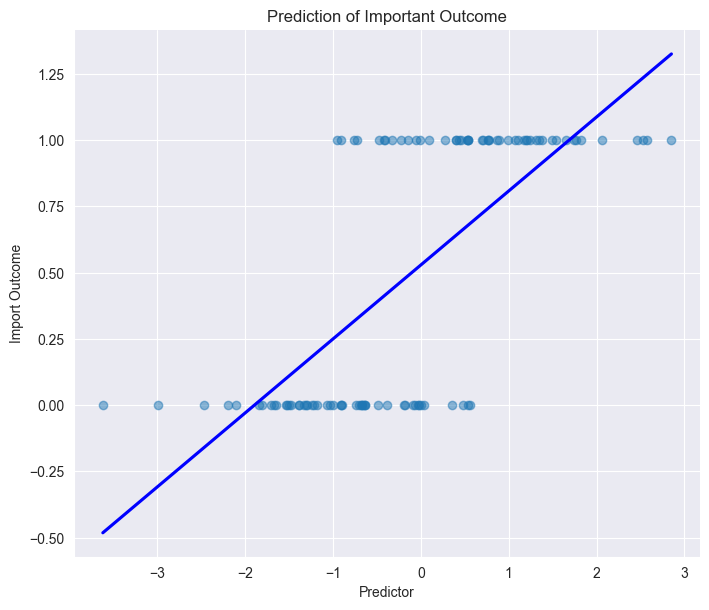

In [28]:
sns.lmplot(data=logit_data,
           x='predictor',
           y='import_outcome',
           scatter_kws={'alpha': 0.5},
           ci=None,
           line_kws={'color': 'blue'},
           height=6,
           aspect=1.2
           )

plt.title("Prediction of Important Outcome")
plt.xlabel("Predictor")
plt.ylabel("Import Outcome")

plt.show()

Now with a logistic regression line:

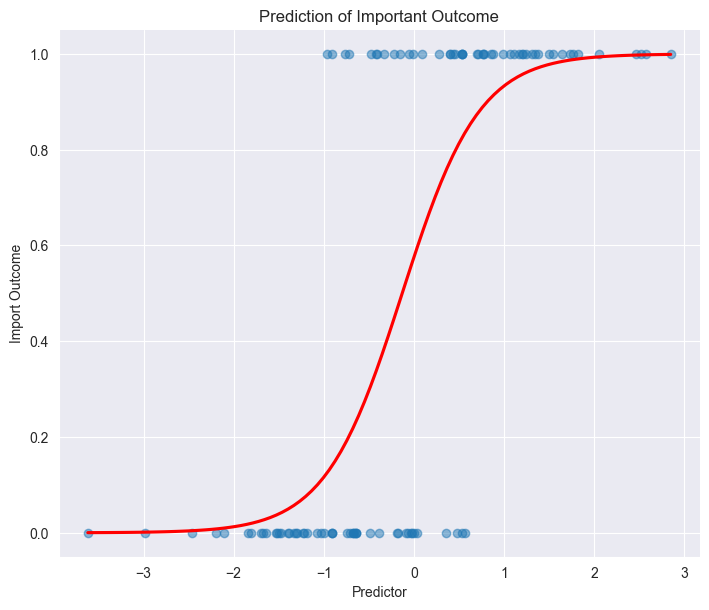

In [29]:
sns.lmplot(data=logit_data,
           x='predictor',
           y='import_outcome',
           scatter_kws={'alpha': 0.5},
           ci=None,
           logistic=True,
           line_kws={'color': 'red'},
           height=6,
           aspect=1.2
           )

plt.title("Prediction of Important Outcome")
plt.xlabel("Predictor")
plt.ylabel("Import Outcome")

plt.show()

Finally, here is an illustration of how to estimate a logistic regression and how to store the predictions. Notice some differences in syntax compared to OLS regression. In particular, we use `glm()` instead of `ols()` and specify the family as `Binomial()`.

In [30]:
import_logit = smf.glm("import_outcome ~ predictor", data=logit_data, family=Binomial()).fit()

print(import_logit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         import_outcome   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35.421
Date:                Wed, 29 Oct 2025   Deviance:                       70.843
Time:                        17:03:43   Pearson chi2:                     68.9
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4923
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3011      0.307      0.979      0.3

Add a new column with the predicted probabilities and residuals:

In [31]:
logit_data['predicted'] = import_logit.predict(logit_data)

logit_data.head()

,predictor,import_outcome,predicted
0,1.496714,1,0.977926
1,0.861736,1,0.909736
2,1.647689,1,0.984374
3,2.523030,1,0.997942
4,0.765847,1,0.889617


Let's try do do this with the cpu dataset by predicting if a processor is Intel based on it's performance.

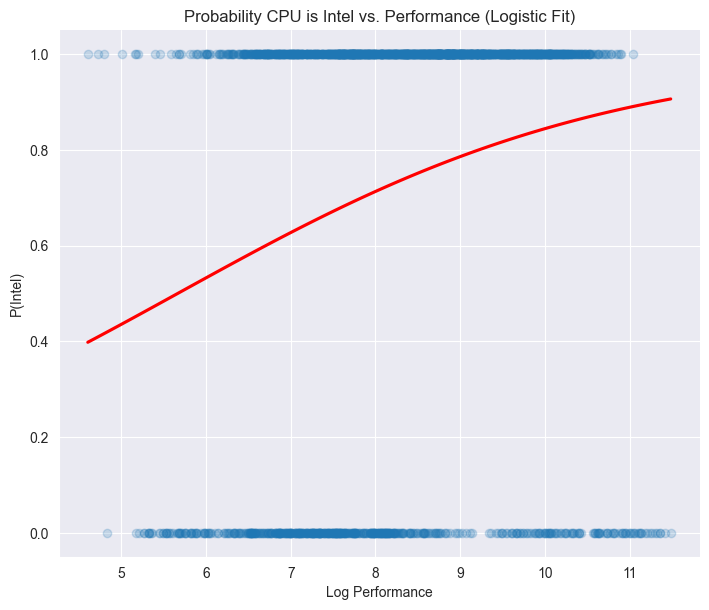

In [32]:
cpu_data = cpu_data.copy()
cpu_data['is_intel'] = (cpu_data['brand'] == 'Intel').astype(int)

sns.lmplot(data=cpu_data,
           x='log_performance',
           y='is_intel',
           scatter_kws={'alpha': 0.2},
           ci=None,
           height=6,
           aspect=1.2,
           logistic=True,
           line_kws={'color': 'red'}
           )

plt.title("Probability CPU is Intel vs. Performance (Logistic Fit)")
plt.xlabel("Log Performance")
plt.ylabel("P(Intel)")

plt.show()